## Import Libraries and Data

In [1]:
# Import libraries   
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# Import data
data = pd.read_csv('Copy of device_data_1.xlsx - Sheet0.csv')
data.head()

,Time,Devicename,Temperature,TDS,PH,DO
0,Wed Jul 07 2021 14:15:09 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.61598,9.91
1,Wed Jul 07 2021 14:16:14 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.12313,9.90
2,Wed Jul 07 2021 14:17:18 GMT+0530 (India Stand...,867378035207325,29.0000,0.0,13.55723,9.90
3,Wed Jul 07 2021 14:18:23 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90
4,Wed Jul 07 2021 14:19:28 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90


## Data Analysis and Processing

In [3]:
# Drop fields which are not required for the model
df = data.drop(['Time', 'Devicename'], axis = 1)
df.head()

,Temperature,TDS,PH,DO
0,29.0625,0.0,13.61598,9.91
1,29.0625,0.0,13.12313,9.90
2,29.0000,0.0,13.55723,9.90
3,29.0625,0.0,14.00000,9.90
4,29.0625,0.0,14.00000,9.90


array([[<AxesSubplot:title={'center':'DO'}>]], dtype=object)

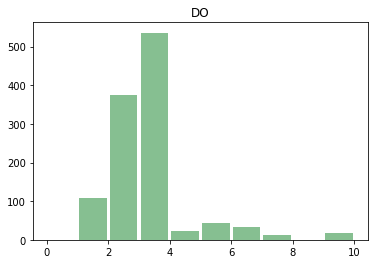

In [4]:
# visualize the datapoints in each range of "DO"
bins_list=[i for i in range(0,11)]
df.hist(column='DO', bins=bins_list, grid=False, color='#86bf91', zorder=2, rwidth=0.9)

It can be observed that majourity of our data lies in the region having DO between (2,4)

In [5]:
df.describe()

,Temperature,TDS,PH,DO
count,1150.000000,1150.000000,1150.000000,1150.000000
mean,26.042283,110.163128,5.813235,3.270148
std,1.265751,57.359872,1.716083,1.345019
min,24.875000,0.000000,4.875184,1.070000
25%,25.500000,124.877675,5.312549,2.610000
50%,25.687500,133.931700,5.413732,3.100000
75%,25.812500,136.523500,5.524703,3.450000
max,34.750000,744.276200,14.000000,9.940000


In [6]:
df.shape

(1150, 4)

<AxesSubplot:>

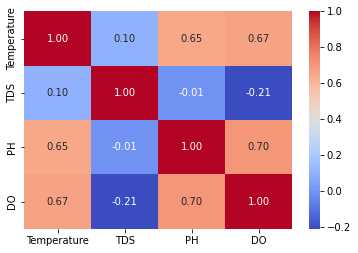

In [7]:
# Heatmap of the features. This shows how the features of our data depend on each other.
sns.heatmap(df[["Temperature","TDS","PH","DO"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

We can clearly see by DO is closely related to PH and Temperature. TDS is somewhat inversely related to DO.

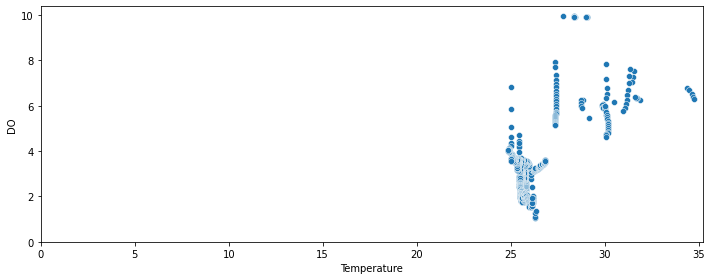

In [8]:
# Plot for Temperature vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['Temperature'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

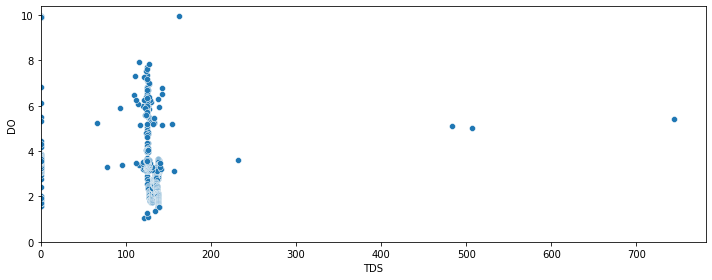

In [9]:
# Plot for TDS vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['TDS'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

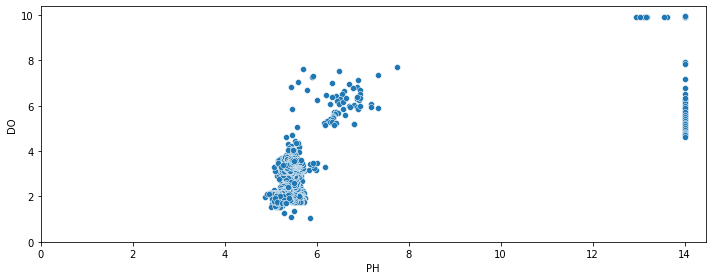

In [10]:
# Plot for PH vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['PH'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

In [11]:
# Normalizing data
df['Temperature']=df['Temperature']/max(df['Temperature'])
df['TDS']=df['TDS']/max(df['TDS'])
df['PH']=df['PH']/max(df['PH'])
df.head()

,Temperature,TDS,PH,DO
0,0.836331,0.0,0.972570,9.91
1,0.836331,0.0,0.937366,9.90
2,0.834532,0.0,0.968374,9.90
3,0.836331,0.0,1.000000,9.90
4,0.836331,0.0,1.000000,9.90


In [12]:
# Check for NULL values
df.isnull().sum()

Temperature    0
TDS            0
PH             0
DO             0
dtype: int64

In [13]:
# Standard Scaling 

from sklearn.preprocessing import StandardScaler
df['Temperature'] = StandardScaler().fit_transform(df['Temperature'].values.reshape(-1,1))
df['PH'] = StandardScaler().fit_transform(df['PH'].values.reshape(-1,1))
df['TDS'] = StandardScaler().fit_transform(df['TDS'].values.reshape(-1,1))
df.head()

,Temperature,TDS,PH,DO
0,2.387145,-1.921396,4.548814,9.91
1,2.387145,-1.921396,4.261494,9.90
2,2.337746,-1.921396,4.514564,9.90
3,2.387145,-1.921396,4.772688,9.90
4,2.387145,-1.921396,4.772688,9.90


## Stlip data

In [14]:
x = df.iloc[:, :-1]   # input feaures
y = df.iloc[:, -1]    # output feature

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1, random_state = 20)

print("Number of fields in Training data = ",len(x_train))
print("Number of fields in Testing data = ",len(x_test))

Number of fields in Training data =  1035
Number of fields in Testing data =  115


In [15]:
x_train.head()

,Temperature,TDS,PH
709,-0.329815,0.453259,-0.402251
809,0.065379,-1.921396,-0.390834
512,-0.379215,0.476079,-0.215775
346,-0.280416,0.440298,-0.269055
1005,0.164177,0.276192,-0.080678


In [16]:
y_train.head()

709     2.16
809     1.74
512     3.10
346     2.96
1005    3.11
Name: DO, dtype: float64

## Model

In [17]:
# Setup
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

2022-01-20 01:37:37.920779: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-20 01:37:37.920883: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
# Defining function for Root Mean Squared Error
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [19]:
# Model Design
tf.random.set_seed(42)

model = Sequential([
    Dense(150, activation='relu'),
    Dense(450, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)


2022-01-20 01:37:59.603121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-20 01:37:59.603194: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-20 01:37:59.603227: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (melio-Nitro): /proc/driver/nvidia/version does not exist
2022-01-20 01:37:59.603881: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


This model contains a 3-layered Neural Network with 'relu' as the activation function. 
- 150 neurons for first layer
- 450 neurons for first layer
- 100 neurons for first layer

In [20]:
# Training the data set
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
33/33 [==============================] - 3s 5ms/step - loss: 1.5569 - rmse: 1.5592
Epoch 2/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.9519 - rmse: 0.9591
Epoch 3/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.7806 - rmse: 0.8009
Epoch 4/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.6990 - rmse: 0.6930
Epoch 5/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.5786 - rmse: 0.5809
Epoch 6/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.5479 - rmse: 0.5474
Epoch 7/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.5293 - rmse: 0.5296
Epoch 8/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.5333 - rmse: 0.5313
Epoch 9/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.5214 - rmse: 0.5187
Epoch 10/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.4983 - rmse: 0.4938
Epoch 11/1000
33/33 [==================

In [21]:
# Evaluate the model
model.evaluate(x_test,y_test)

4/4 [==============================] - 1s 4ms/step - loss: 0.6157 - rmse: 0.5921


[0.615671694278717, 0.5920875668525696]

In [22]:
# Make predictions for the testing data
pred = model.predict(x_test)

In [23]:
df_pred = pd.DataFrame(pred)
print("Prediction stats: ")
df_pred.describe()

Prediction stats: 


,0
count,115.000000
mean,3.443721
std,1.622746
min,1.617268
25%,2.882397
50%,3.050187
75%,3.501249
max,13.618276


In [24]:
print("y_test stats: ")
y_test.describe()

y_test stats: 


count    115.000000
mean       3.332609
std        1.367148
min        1.070000
25%        2.785000
50%        3.120000
75%        3.445000
max        9.930000
Name: DO, dtype: float64

We can compare the stats for pred and y_test

In [25]:
# Error Calculation
err = 0
pred = pred.flatten()
y_test = np.array(y_test)

for i in range(0,len(pred)):
  err = err + abs(pred[i]-y_test[i])/y_test[i]

err = err/pred.shape[0]

err

0.08110928541432755

In [26]:
# Difference between predicted and true value 
dif = abs(pred-y_test)
print("Mean of differences : ", np.mean(dif))
print("Median of differences : ", np.median(dif))

Mean of differences :  0.24170081039096997
Median of differences :  0.0818240165710451


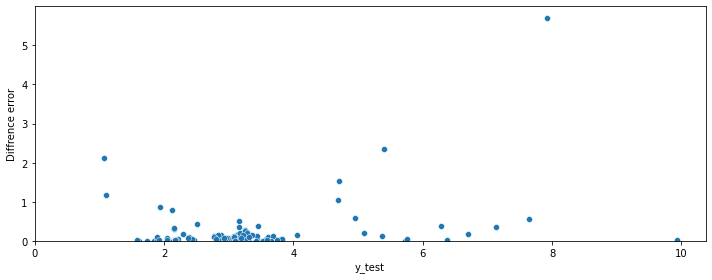

In [27]:
# Scatter-plot of yy
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = y_test, y = dif)

plt.xlabel('y_test')
plt.ylabel('Diffrence error')

plt.xlim(0)
plt.ylim(0)
plt.show()

## Conclusion
- It can be observed that the predictions are more accurate for 'DO' values in range (2,4). 
- For higher values the error is high. This is due to the fact that the dataset contains less datapoints for 'DO' values above 4. This can be improved by adding more data points for 'DO' > 4.
